In [43]:
#from pycocotools.coco import COCO
import glob
import _init_paths
from fast_rcnn.config import cfg
from fast_rcnn.test import im_detect
from fast_rcnn.nms_wrapper import nms
from utils.timer import Timer
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import caffe, os, sys, cv2
import argparse
from fast_rcnn.config import cfg, cfg_from_file, cfg_from_list
from datasets.config import CLASS_SETS
from datasets.vatic_hierarchy import VaticData
import random
from scipy.misc import imread

In [11]:
MAIN_CLASSES = CLASS_SETS['coco']
SUB_CLASSES = CLASS_SETS['vehicle-types']

In [65]:
mapper = {"van":"car", "trailer-head":"truck",\
              "sedan/suv":"car", "scooter":"motorcycle", "bike":"bicycle", "pickup": "car"}  

In [66]:
A = VaticData("tanktruck", MAIN_CLASSES, SUB_CLASSES, CLS_mapper=mapper)

Meta data path: /root/data/data-tanktruck/meta.json does not exist. Use Default meta data
{'test': {'start': None, 'sets': [1], 'end': None, 'stride': 30}, 'train': {'start': None, 'sets': [0], 'end': None, 'stride': 1}, 'format': 'jpg'}
Total: 3073 images


In [76]:
def show_statistic(imdb, MAIN_CLASSES, SUB_CLASSES):
    
    gts = imdb.gt_roidb()
    statistic = {'length': len(gts), "main":{}, "sub":{} }
   
    
    for gt in gts:
        for i, bbox in enumerate(gt['boxes']):          
            main_cls_idx = gt['gt_classes'][i]
            main_label = MAIN_CLASSES[main_cls_idx]
            statistic["main"][main_label] = statistic["main"].get(main_label, 0 ) + 1
            sub_cls_idx = gt['sub_gt_classes'][i]
            sub_label = SUB_CLASSES[sub_cls_idx]
            statistic["sub"][sub_label] = statistic["sub"].get(sub_label, 0 ) + 1
    return statistic
            



def viz_vaitc(vatic, length, K=5):
    gts = vatic.gt_roidb()
    edgecolor = "green"
    for i in range(K):
        idx = random.randint(0, length)
        img_path = vatic.image_path_at(idx)
        img = imread(img_path)
        gt = gts[idx]
        fig, ax = plt.subplots(figsize=(6, 6))
        plt.imshow(img)
        
        for i, bbox in enumerate(gt['boxes']):
          
            main_cls_idx = gt['gt_classes'][i]
            main_label = MAIN_CLASSES[main_cls_idx]
            sub_cls_idx = gt['sub_gt_classes'][i]
            sub_label = SUB_CLASSES[sub_cls_idx]
            if sub_label == "not-target" or sub_label == "empty":
                sub_label = ""
                    
            ax.add_patch(
                plt.Rectangle((bbox[0], bbox[1]),
                              bbox[2] - bbox[0],
                              bbox[3] - bbox[1], fill=False,
                              edgecolor=edgecolor, linewidth=3.5)
                )
            ax.text(bbox[0], bbox[1] - 2,
                    '{:s} {:s}'.format(main_label, sub_label),
                    bbox=dict(facecolor='blue', alpha=0.5),
                    fontsize=14, color='white')

       
            
        plt.show()
    

In [61]:
statistic = show_statistic(A, MAIN_CLASSES, SUB_CLASSES)

In [62]:
statistic

{'length': 3073,
 'main': {u'bus': 395, u'car': 5427, u'truck': 3660},
 'sub': {'not-target': 4055, 'sedan/suv': 5318, 'van': 109}}

In [81]:
names = ["A1HighwayDay", 'B2HighwayNight', "pickup","tanktruck", "NCTU_Highway_slow"]
for name in names:
    vatic = VaticData(name, MAIN_CLASSES, SUB_CLASSES, CLS_mapper=mapper, train_split="all")
    print(name)
    print(show_statistic(vatic, MAIN_CLASSES, SUB_CLASSES))
    print("========\n")

Meta data path: /root/data/data-A1HighwayDay/meta.json does not exist. Use Default meta data
Use both split for training
{'test': {'start': None, 'sets': [1], 'end': None, 'stride': 30}, 'train': {'start': None, 'sets': [0, 1], 'end': None, 'stride': 1}, 'format': 'jpg'}
Total: 6320 images
A1HighwayDay
{'length': 6320, 'main': {u'car': 12616, u'truck': 4598, u'bus': 764}, 'sub': {'sedan/suv': 12165, 'van': 451, 'not-target': 5362}}

Meta data path: /root/data/data-B2HighwayNight/meta.json does not exist. Use Default meta data
Use both split for training
{'test': {'start': None, 'sets': [1], 'end': None, 'stride': 30}, 'train': {'start': None, 'sets': [0, 1], 'end': None, 'stride': 1}, 'format': 'jpg'}
Total: 6320 images
B2HighwayNight
{'length': 6320, 'main': {u'car': 62116, u'truck': 2742, u'bus': 3829}, 'sub': {'sedan/suv': 59136, 'van': 2980, 'not-target': 6571}}

Meta data path: /root/data/data-pickup/meta.json does not exist. Use Default meta data
Use both split for training
{'tes

Meta data path: /root/data/data-B2HighwayNight/meta.json does not exist. Use Default meta data
{'test': {'start': None, 'sets': [1], 'end': None, 'stride': 30}, 'train': {'start': None, 'sets': [0], 'end': None, 'stride': 1}, 'format': 'jpg'}
Total: 3160 images


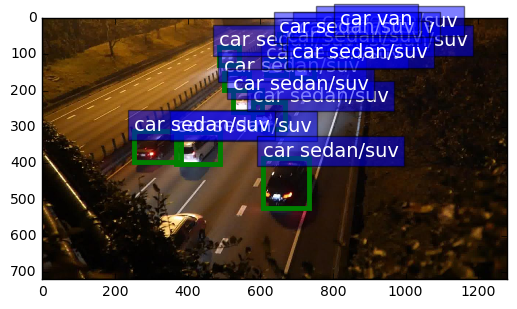

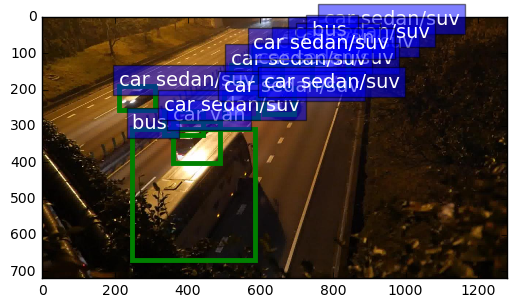

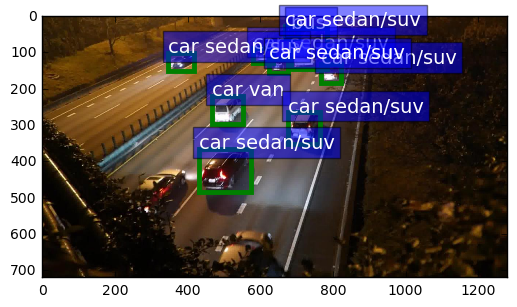

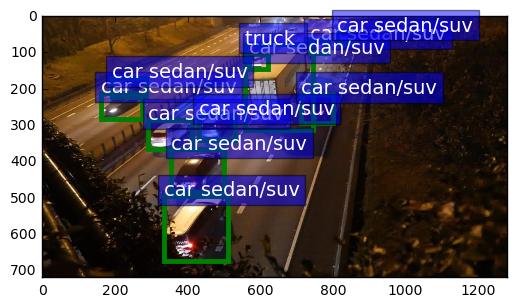

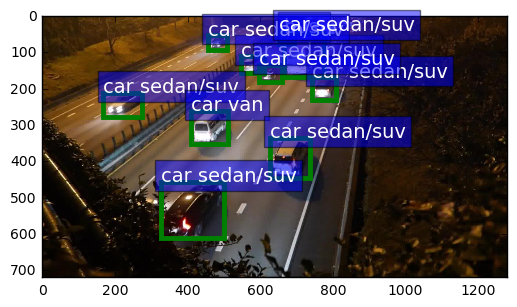

In [82]:
vatic = VaticData("B2HighwayNight", MAIN_CLASSES, SUB_CLASSES, CLS_mapper=mapper)
viz_vaitc(vatic, len(vatic.gt_roidb())-1)

In [37]:
random.randint(0,2)

2